In [15]:
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.available

In [16]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

In [4]:
# 讀xls檔案到dataframe
data = pd.read_excel("月薪_總受雇員工人數_總工時&行業_2.xls")
# print(data)
# data.info()
# data.head()
# data.tail()
# data['工業及服務業']
# data['工業'][:14]
# data['工業'][15:29]
# data['工業'][30:44]
# sum(data['工業'][:14])
# type(data['工業'][:14])
# data['工業'][0:14].describe()
# data['工業'][0:14].shape
# type(data[:0]) # pandas.core.frame.DataFrame
# list(data[:0])

In [5]:
# 所有的行業別(20個)
profession = list(data[:])
profession.remove('行業')
n_profession = len(profession)
print(n_profession)
print(profession)


20
['工業及服務業', '工業', '礦業及土石採取業', '製造業', '電力及燃氣供應業', '用水供應及污染整治業', '營造業', '服務業', '批發及零售業', '運輸及倉儲業', '住宿及餐飲業', '資訊及通訊傳播業', '金融及保險業', '不動產業', '專業﹑科學及技術服務業', '支援服務業', '教育服務業', '醫療保健服務業', '藝術﹑娛樂及休閒服務業', '其他服務業']


In [6]:
# 以下是106年1月~107年2月(14個月份)的統計資料(來源: 主計處)
# average_salary: 平均薪資(取到小數點後兩位)
# n_employees: 平均受僱員工人數(取到整數)
# average_working_hour: 平均工作小時(取到小數點後兩位)
n_month = 14

average_salary = []
n_employees = []
average_working_hour = []

for p in profession:
    average_salary.append(round(sum(data[p][:14]) / n_month, 2))
    n_employees.append(round(sum(data[p][15:29]) / n_month, 0))
    average_working_hour.append(round(sum(data[p][30:44]) / n_month, 2))


print("平均薪資")
print(average_salary)

print("\n平均受僱員工人數")
print(n_employees)

print("\n平均工作小時")
print(average_working_hour)

平均薪資
[53295.29, 51297.86, 59152.71, 51978.79, 96419.36, 45842.29, 44502.93, 54828.21, 50768.5, 55019.71, 35032.21, 73399.43, 96578.0, 45731.79, 63044.29, 37391.0, 25924.07, 69198.93, 38821.64, 36311.07]

平均受僱員工人數
[7569438.0, 3287950.0, 3655.0, 2764615.0, 30399.0, 28285.0, 460995.0, 4281488.0, 1684375.0, 290577.0, 420034.0, 202822.0, 382081.0, 115599.0, 260388.0, 350633.0, 74601.0, 354750.0, 57450.0, 88177.0]

平均工作小時
[167.29, 171.59, 167.6, 173.07, 173.92, 165.29, 163.14, 163.98, 162.66, 169.71, 158.96, 160.23, 162.34, 166.45, 162.77, 179.48, 129.78, 164.41, 162.79, 176.67]


In [7]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color="gray",linestyle='dashed')
    ax.add_line(l)
    return l

C:\Users\p01\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


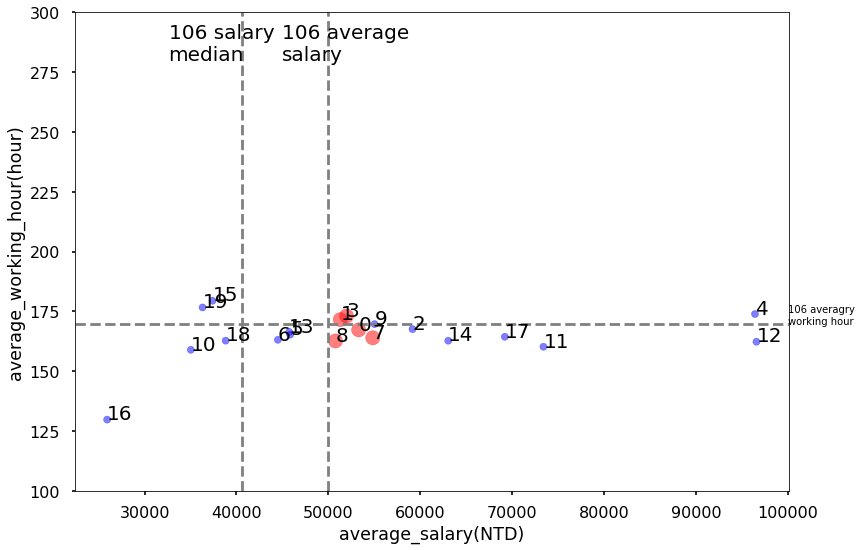

In [8]:
import matplotlib.lines as mlines
# plt scatter chart
# set_matplot_zh_font()

# plt.style.use('classic')
# plt.style.use('seaborn-paper')
plt.style.use('seaborn-poster')

fig = plt.figure()

# 設定x y 軸的標題
plt.xlabel("average_salary(NTD)")
plt.ylabel("average_working_hour(hour)")
ax = fig.add_subplot(111)

colors = []
area = []

# 受僱員工人數 > 500000的行業用紅色比較大的點代表
threshold = 500000
for x in n_employees:
    if x > threshold:
        colors.append('r')
        area.append(200)
    else:
        colors.append('b')
        area.append(50)

ax.set_ylim([100, 300])
# ax.set_yticks(np.arange(0,300,10))
ax.scatter(average_salary, average_working_hour, s=area, c=colors, alpha=0.5)

# 設定資料標籤
# i是職業代號
for i in range(len(profession)):
    ax.annotate(i,(average_salary[i], average_working_hour[i]), size=20)
    
# 資料來源: https://www.dgbas.gov.tw/ct.asp?xItem=42513&ctNode=5624
# https://earnings.dgbas.gov.tw/
# https://www.dgbas.gov.tw/ct.asp?xItem=42224&ctNode=2314
# https://www.dgbas.gov.tw/ct.asp?xItem=41083&ctNode=5624&mp=1
_106_average_salary = 49989
_106_average_working_hour = 169.60
_106_salary_median = 40612

ax.annotate("106 average \nsalary", (_106_average_salary - 5000, 280), size=20)
ax.annotate("106 averagry \nworking hour", (100000, _106_average_working_hour))
ax.annotate("106 salary \nmedian", (_106_salary_median-8000, 280), size=20)
newline((_106_average_salary, 0), (_106_average_salary, 200))
newline((0, _106_average_working_hour), (100000, _106_average_working_hour))
newline((_106_salary_median,0), (_106_salary_median, 200))

In [9]:
# save figure
fig.savefig("my figure.png")

In [10]:
for i, x in enumerate(profession):
    print(i,x)

0 工業及服務業
1 工業
2 礦業及土石採取業
3 製造業
4 電力及燃氣供應業
5 用水供應及污染整治業
6 營造業
7 服務業
8 批發及零售業
9 運輸及倉儲業
10 住宿及餐飲業
11 資訊及通訊傳播業
12 金融及保險業
13 不動產業
14 專業﹑科學及技術服務業
15 支援服務業
16 教育服務業
17 醫療保健服務業
18 藝術﹑娛樂及休閒服務業
19 其他服務業


In [18]:
data2 = pd.read_excel("男女_行業_年.xls")
#print(data2)
#\print(data2.shape)

(2, 40)


In [33]:
# data2[1:]
# data2.ix[1]
man_salary = []
woman_salary = []
# for i, x in enumerate(data2.ix[1]):
for i, x in enumerate(data2.iloc[1]):
    if i % 2 == 0:
        man_salary.append(x)
    else:
        woman_salary.append(x)
        
print(man_salary)
print(woman_salary)

[54066, 53234, 59230, 54754, 97422, 43788, 44266, 54952, 50448, 55244, 35633, 75518, 91939, 43472, 66273, 36713, 28455, 100618, 45568, 38694]
[45333, 39498, 42931, 39715, 78307, 43596, 33602, 48365, 44587, 48071, 31955, 61915, 82768, 43223, 52960, 36037, 23756, 56988, 28742, 31447]


In [21]:
import numpy as np

E:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


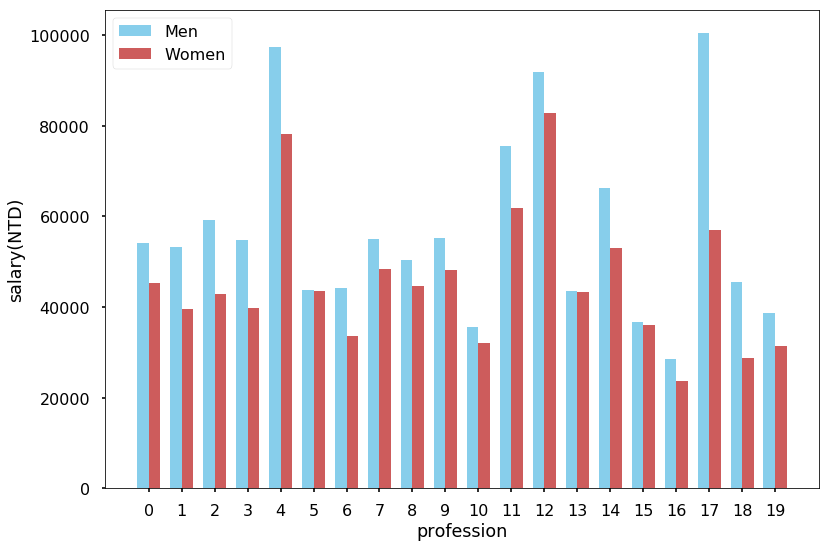

In [22]:
ax = fig.add_subplot(111)

ind = np.arange(n_profession)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, man_salary, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, woman_salary, width,
                color='IndianRed', label='Women')

ax.set_xlabel("profession")
ax.set_ylabel("salary(NTD)")
ax.set_xticks(ind)
ax.legend()

In [23]:
salary_differ = []
for i in range(n_profession):
    salary_differ.append(man_salary[i] - woman_salary[i])
print(salary_differ)

[8733, 13736, 16299, 15039, 19115, 192, 10664, 6587, 5861, 7173, 3678, 13603, 9171, 249, 13313, 676, 4699, 43630, 16826, 7247]


In [2]:
#plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticks(ind)
ax.set_xlabel("profession")
ax.set_ylabel("salary difference\nbetween gender(NTD)")
rects1 = ax.bar(ind, salary_differ)

NameError: name 'plt' is not defined

In [3]:

import pandas as pd
import seaborn as sns; sns.set()
data3 = pd.read_excel("106 職業 進入率 退出率.xls")
# data3 = pd.read_excel("./薪資平台 統計資料/106 職業 進入率 退出率.xls")
entry_rate = []
exit_rate = []
# profession = ['工業及服務業', '工業', '礦業及土石採取業', '製造業', \
#               '電力及燃氣供應業', '用水供應及污染整治業', '營造業', \
#               '服務業', '批發及零售業', '運輸及倉儲業', '住宿及餐飲業', \
#               '資訊及通訊傳播業', '金融及保險業', '不動產業', \
#               '專業﹑科學及技術服務業', '支援服務業', '教育服務業', \
#               '醫療保健服務業', '藝術﹑娛樂及休閒服務業', '其他服務業']


for p in profession:
    entry_rate.append(data3[p][0: 12])
    exit_rate.append(data3[p][12: 24])

# print(entry_rate)
# print(exit_rate)


FileNotFoundError: [Errno 2] No such file or directory: '106 職業 進入率 退出率.xls'

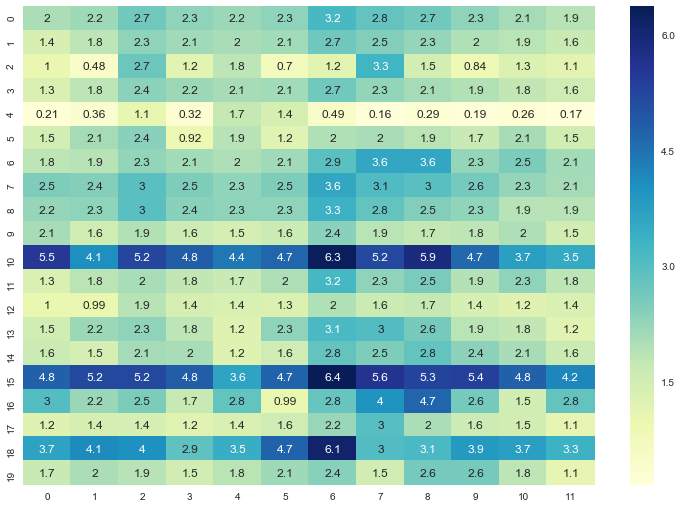

In [37]:
sns.heatmap(entry_rate, annot=True,cmap="YlGnBu")

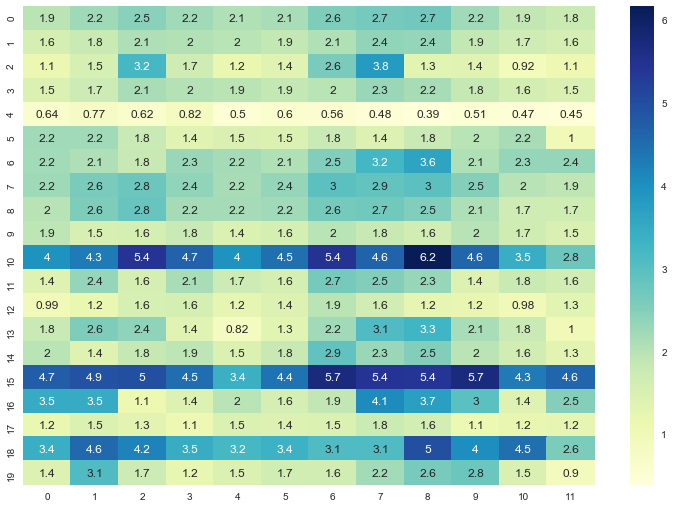

In [38]:
sns.heatmap(exit_rate, annot=True,cmap="YlGnBu")